### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2023 ###

### Final Course Project: Due 5/5/23

# Vehicle Relocation Schedule Optimization#

Haitian Du ( hdu47@wisc.edu)  

Jiaxin Tian (jtian85@wisc.edu)  

Huong Thien Do (tdo7@wisc.edu) 

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
    1. [Case 1: General Model](#2A.-General-Model)
    1. [Case 2: Random return](#2A.-Case-1)
    1. [Case 3: Third-party supplier](#2A.-Case-2)
1. [Solution](#3.-Solution)
    1. [Case 1: General Solution](#3.-)
    1. [Case 2: Random return](#3.-)
    1. [Case 3: Third-party supplier](#3.-)
1. [Results and Discussion](#4.-Results-and-discussion)
    1. [General results](#4.A.-Feel-free-to-add-subsections)
    1. [Case interpretation](#4.A.-Feel-free-to-add-subsections)
    1. [Trade-off between profits and service rate](#4.A.-Feel-free-to-add-subsections)
    1. [Acceptable price](#4.A.-Feel-free-to-add-subsections)
1. [Conclusion](#5.-Conclusion)

# 1. introduction

<b/> Overview

It is always a challenge for car rental companies to match the vehicle supply with order demand in all the locations. This is due to the low transportability of inventory in the industry. The cost of relocating vehicles from other locations for meeting the demand of a certain location, especially when the locations are far from long distance, could be even higher than the potential profit. Therefore, maximizing the service rate while not hurting the revenue becomes a significant business target in the car rental industry.
In this project,we mainly focus on the car relocation schedule between five locations of Zipcar in the Chicago area. We intend to perform an analysis to find the optimal relocation schedules benefiting their business performance. The five locations we choose are in the same region and not far from each other because we need to satisfy the premise that relocation cost is lower than the potential profit. The demand data was from a member’s project last semester(Tian,2022). The data was estimated based on research.


We will analyze three different cases in this project. In the first case, we assume that all customers will return vehicles to the original location after use, while in the second case we assume the vehicles will be returned to random locations instead. We intend to compare the business results between the two cases to see the impact from the supply variability.


In the third case, we make a new assumption that there are third-party companies nearby supporting our company when backorders happen. We can rent more vehicles from the third-party company at some cost when the car inventory of our locations is in shortage.  We initially assume outsourcing from third parties will reduce our profit due to the high cost. In this case, the rental strategy with third-party companies would also be a variable in the optimization problem.

The problem is a vehicle sharing problem. There are 5 stations in this city {A, B, C, D, E}, with each station having an amount of vehicles available. The demand in each station is randomly distributed, but we simplified the demand to some constants in this optimization problem. The example demand for each station is shown in the time schedule. Initially, each station has 30 vehicles at 0:00, which means there are 150 vehicles in total. From 0:00 to 23:00, the company can relocate any number of vehicles from one station to another in order to better satisfy customer demand. The relocation cost is based on the distance between stations. In the Figure1 for example, the relocation cost from A to B would be higher than A to E due to the longer distance. The distance would also make the travel time and return time different for each customer, which would influence the station inventory. Every time we successfully serve a customer, the company would gain profits based on their distance. If a customer arrives but there is no vehicle available, a backorder incurs with a penalty cost of 100 . The objective of this optimization problem is to satisfy the maximum number of customers and to maximize the total profits.

To better visualize the network flow in this problem, we use figure 1 to interpret the relationship and the distance between each station. We consider station E as a center station. If there is one single line between two stations, for example A to E, the distance is 1. If the travel crosses one city, for example A to D, the distance will be 2. The revenue for one distance is 80, and the relocation cost for one distance is 30.


![jupyter](./proposal_graph.png)
*Figure 1. Example network between each station*


# 2. Mathematical Model

## 2.1 General model

In this section, the basic mathematical models that used in this project will be introduced. For each case & senario, we will form it as one optimization problem, with some variables, constraints, and objectives. The purpose of this section is to briefly illustrate the models used in coding part and help the reader to understand the logic in our code.

Firstly, we are solving the rental vehicle problem with customers returning their vehicles at the same statoin. The objective is to find the relocation schedule that maxmize the profit and the customer service rate. The problem is analyzed in time-series, so we should define the single process in this system for one customer.

$ \qquad \qquad \qquad \qquad \qquad 1.\qquad Customer \ arrives \ at \ station\ {a} $

$ \qquad \qquad \qquad \qquad \qquad 2.\qquad if \ vehicles \ available \ at \ station\ {a} $

$ \qquad \qquad \qquad \qquad \qquad \rightarrow 3.\qquad Customer \ spend \ some \ time \ to \ station\ {b} $

$ \qquad \qquad \qquad \qquad \qquad \quad 4.\qquad Inventory \ at \ station  \ b \ increases $

$ \qquad \qquad \qquad \qquad \qquad 2.\qquad if \ no\ vehicle \ available \ at \ station\ {a} $

$ \qquad \qquad \qquad \qquad \qquad \rightarrow 3.\qquad Lose \ customer \ with \ penalty \ cost   $





![jupyter](./Introduction.png)
*Figure 2. The Flow Chart of Order Process*

This problem is considered in whole day (24 hours) time period, so the inventory level and the customer demand vary at each time. For exampe, we can set variable $ I_{i,j} $ as the inventory level of station i at time j. In part of inventory level, there are some other variables we create to better model this problem. 

$ \qquad \qquad \qquad \qquad \qquad I_{i,j}$ :  *the inventory level in station i at time j* 
 
$ \qquad \qquad \qquad \qquad \qquad N_{i,j}$ :  *the number of customer served in station i at time j* 
 
$ \qquad \qquad \qquad \qquad \qquad B_{i,j}$ :  *the number of backorder station i at time j* 
 
$ \qquad \qquad \qquad \qquad \qquad L_{i,j}$ :  *the total number of vehicle leaving in station i at time j* 
 
$ \qquad \qquad \qquad \qquad \qquad A_{i,j}$ :  *the total number of vehicle arriving in station i at time j* 

$ \qquad \qquad \qquad \qquad \qquad R_{i,j}$ :  *the number of vehicle relocating in direction i at time j*

 
$ \qquad \qquad \qquad \qquad \qquad Cr $ :  *the relocation cost when relocating one vehicle* 
  
$ \qquad \qquad \qquad \qquad \qquad Re $ :  *the revenue gained when serveing one customer* 
   
$ \qquad \qquad \qquad \qquad \qquad P $ :  *the penalty cost company should pay when losing one customer* 

$ \qquad \qquad \qquad \qquad \qquad From_{i,j} $ :  *the total relocation number from station i at time j* 

$ \qquad \qquad \qquad \qquad \qquad To_{i,j} $ :  *the total relocation number to station i at time j* 

Before discussing the cosntraints in this problem, we should explain the variable $ R_{i,j} $ first, which associated with the network flow between each city (Figure.1). The figure shows one example about the network flow, and we will use this as an example to solve the vehicle-sharing optimization. In first case, each road in the figure is open, which means that we can relocate the vehicles from each station to another one. The relocation work consumes the same time as the customer's travel time from one city to another. 

Because this problem is discussed in one-day's time period, the initial states for some of the variables should be indluded in the model, so the assumptions we discussed in problem statement are considered as constraints in model. In the first case, we assume that each station has 20 available vehicles initially, $ I_{i,1} $ = 20. Because the problem start at time = 1, if the traveling time is assumed to be 2 hours, there will be no arrival for each station, $ A_{i,1:2} $ = 0. There are some other constraints that we need to include in our model:

* The customer served at each time point should be the minimum value of the demand and inventory. If the inventory level is large enough for customer demand, the number of customer served ($ N_{i,j} $) should be the demand number; if the customer demand exceed the inventory level, the number of customer served ($ N_{i,j} $) should be the inventory value, and the unserved customers become backorders ($ B_{i,j} $). These constraints can be expressed by:


\begin{alignat}{2}
    N_{i,j} \ = & \ Min \{ I_{i,j}, D_{i,j} \} \\
    B_{i,j} \ = & \ D_{i,j}\ - \ N_{i,j} \\
\end{alignat}

* Because the first constraint above is a conditional constraint, it is hard to solve in optimization problem. We use some tricks and tips to simplify this constraint. $ N_{i,j} $ should be the minimum value of $ \{ I_{i,j}, D_{i,j} \} $. We can create a new variable $ X_{i,j} $ here, satisfying $ X_{i,j} \ \leq I_{i,j} $ and $ X_{i,j} \ \leq D_{i,j} $. Then, we maximize the value of X_{i,j}, which gives the same result as $ Min \{ I_{i,j}, D_{i,j} \} $. In the objective function, the value of $ X_{i,j} $, which is also $ N_{i,j} $, is maximized, so we can directly use the two inequalities to replace the first constraint above:


\begin{alignat}{2}
    N_{i,j} \ \leq& \ I_{i,j} \\
    N_{i,j} \ \leq& \ D_{i,j} \\
\end{alignat}

* Considering the relocation at each station, at each time some vehicles could be relocated to random stations. This is the target variable that we are going to solve. For eaxmple, the vehicles from station A can be relocated to station E in that case, and the vehicles from station E can be relocated to either A, B, C or D. Because the possible route at each station are different, we let $ R_{i,j} $ denotes the vehicle number relocating on direction i at time j. And $\sum\limits_{k}R_{k,j}  $ denotes the sum of all relocation numbers from one station with k possible directions from that station.


\begin{alignat}{2}
    From_{i,j}  =& \sum\limits_{k}R_{k,j} \\
    From_{i,j} \ \leq& \ I_{i,j}\ - \ N_{i,j} \\
    L_{i,j} \ =& \ From_{i,j}\ + \ N_{i,j} \\
\end{alignat}

* To make the system sustainable, the vehicles returned from customers and relocation should be considered as new invetory at the new station. The travel time and relocation time are assumed to be $ \Delta$. In the first case, we assume the travel time and relocation time are the same. Because we assumed that the customers will return their vehicles to the same station where thet picked, the number of arrival contains the number of customer served. 



\begin{alignat}{2}
    To_{i,j}  =& \sum\limits_{k}R_{k,{j \ - \ \Delta}} \\
    A_{i,j} \ =& \ To_{i,j}\ + \ N_{i,{j \ - \ \Delta}} \\
\end{alignat}

* The problem is continuous in time series, so the inventory level is updating in time.



\begin{alignat}{2}
    To_{i,j}  =& \sum\limits_{k}R_{k,{j \ - \ \Delta}} \\
    A_{i,j} \ =& \ To_{i,j}\ + \ N_{i,{j \ - \ \Delta}} \\
\end{alignat}

* Combining with the remaining constraints, we have the following model:
 

\begin{alignat}{2}
    \max_{R_{i,j}}~~ & \sum\limits_{i}^{n}\sum\limits_{j}^{24}  {Re N_{i,j}}-{Cr R_{i,j}}  - {P B_{i,j}} & \\
    \mathrm{s.t.} \quad & N_{i,j} \ \leq \ I_{i,j}, &\quad i = 1, 2, \ldots, n, \, \ j = 1, 2, \ldots, 24 \nonumber \\
    & N_{i,j} \ \leq \ D_{i,j}, & \\
    & From_{i,j} \  = \sum\limits_{k}R_{k,j},\\
    & From_{i,j} \ \leq \ I_{i,j}\ - \ N_{i,j}\\
    & To_{i,j} \ = \sum\limits_{k}R_{k,{j \ - \ \Delta}}\\
    & L_{i,j} \ = \ From_{i,j}\ + \ N_{i,j}\\
    & A_{i,j} \ = \ To_{i,j}\ + \ N_{i,{j \ - \ \Delta}}\\
    & I_{i,j} \ = \ I_{i,j \ - \ 1}\ + \ A_{i,j} \ - \ L_{i,j \ - \ 1}\\
\end{alignat}

## 2.2 Return vehicles to random stations

In the previous question, we assumed that the customers will return their vehicles to the same station where they picked. In this section, we will discuss how to model the problem if customers randomly choose their destinations, which would create more uncertainty in our model. To solve this problem, we indroduce a new variable $ T_{i,j,k} $, which denotes the number of vehicles traveling from station $ i $ to $ j $ at time $ k $. The sum of $ T_{i,j,k} $ from one station should equal to the customer served number ($ N_{i,k} $):


\begin{alignat}{2}
    N_{i,k} \ = \sum\limits_{j\ = \ 1}^{n - 1}T_{i,j,k} \\
\end{alignat}

To find one vehicle's destination, we assign them with one random destination, with each probability $ P_{j} \ = \ {\frac{1}{n}} $, where $P_{j}$ denotes the probability to destination $ j $, and $ n $ is the count for station. When the value of $N_{i,j} $ is large, we can use the expectation to estimate $ T_{i,j,k} $.



\begin{alignat}{2}
    \mathbb{E}\ (T_{i,j,k}) \ = \frac{1}{n} \ N_{i,k} \\
\end{alignat}

Because sometimes the expectation number can be fraction by using the above equation, we simplify the way expressing $ T_{i,j,k} $ for better understanding. For any station $ i $ and time $ k $, the difference in $ T_{i,j,k} $ between each $ j $ station should not exceed 1. 


\begin{alignat}{2}
    |\ T_{i,j_1,k} \ - \ T_{i,j_2,k} \ |\ \leq \ 1  \qquad   {\forall}\ j_1,j_2 \in \{ 1, 2, \ldots, n \} \\
\end{alignat}

There is a trade-off in this case. The two targets we want to get is to maximize the total profits and maximize the customer satisfaction. We did not introduce the trade-off because we use the penalty cost in total profits calculation as the trade-off. Since the penalty cost is larger than relocation cost, we can always maximize the two targets by only maximizing the profits. When the penalty cost is smaller, we can rewrite the objective function as:

\begin{alignat}{2}
    \max_{R_{i,j}}~~  |\sum\limits_{i}^{n}\sum\limits_{j}^{24}  {Re N_{i,j}}-{Cr R_{i,j}}  - {P B_{i,j}} |\ +\ \lambda |\sum\limits_{i}^{n}\sum\limits_{j}^{24} {N_{i,j}} | \\
\end{alignat}

## 2.3 Third - party supplier 

Since backorders always happen, the company can choose to rent some vehicles from other suppliers to meet the customer's requests. In this case, we assume these vehicles are rented daily with some cost. This cost varies, and we define it to be $ Mc\ = \ 500$ in our model. And introduce variable $ M_i $ as the rent number at station $ i $. Because these vehicles are rented daily, we should only the initial inventory level $ I_{i,1} $. 

\begin{alignat}{2}
    I'_{i,1} \ = I_{i,1}\ + \ M_{i} \\
\end{alignat}

* With new objective function:

\begin{alignat}{2}
    \max_{R_{i,j}, M_i}~~  \sum\limits_{i}^{n}\sum\limits_{j}^{24}  {Re N_{i,j}}-{Cr R_{i,j}}  - {P B_{i,j}} - {Mc M_{i}} \\
\end{alignat}

There is a trade-off in this case, because when we invest more from the supplier, we can satisfy more customers with more cost. The two targets we are going to meet are: to maximize the profits and maximize the customer satisfaction. When one part goes up, the another part always drops. To balance the trade-off between these two targets, we set a tradeoff parameter $ \lambda $, which changes the weight of each target. This parameter is changable for users, so that they can decide which target is more important. The objective function becomes:

\begin{alignat}{2}
    \max_{R_{i,j}, M_i}~~  |\sum\limits_{i}^{n}\sum\limits_{j}^{24}  {Re N_{i,j}}-{Cr R_{i,j}}  - {P B_{i,j}} - {Mc M_{i}}|\ +\ \lambda |\sum\limits_{i}^{n}\sum\limits_{j}^{24} {N_{i,j}} | \\
\end{alignat}

Suppose that for each supplier in different stations, they have a minimum number of rental, which means the value of $ M_{i} $ should exceed some values. In this case, our target is to find the maximum price we are going to take to maintain the profit in case 2. The new constraint is the profit should be equal or larger than the previous one. Combining with the remaining constraints, we have the following model:

\begin{alignat}{2}
    \max ~~ & Mc & \\
    \mathrm{s.t.} \quad & N_{i,j} \ \leq \ I_{i,j}, &\quad i = 1, 2, \ldots, n, \, \ j = 1, 2, \ldots, 24 \nonumber \\
    & N_{i,j} \ \leq \ D_{i,j}, & \\
    & From_{i,j} \  = \sum\limits_{k}R_{k,j},\\
    & From_{i,j} \ \leq \ I_{i,j}\ - \ N_{i,j}\\
    & To_{i,j} \ = \sum\limits_{k}R_{k,{j \ - \ \Delta}}\\
    & L_{i,j} \ = \ From_{i,j}\ + \ N_{i,j}\\
    & A_{i,j} \ = \ To_{i,j}\ + \ \sum\limits_{k}^{n}  T_{k,i,{j \ - \ \Delta}}\\
    & I_{i,j} \ = \ I_{i,j \ - \ 1}\ + \ A_{i,j} \ - \ L_{i,j \ - \ 1}\\
    & I'_{i,1} \ = I_{i,1}\ + \ M_{i}\\
    & |\ T_{i,j_1,k} \ - \ T_{i,j_2,k} \ |\ \leq \ 1 & {\forall}\ j_1,j_2 \in \{ 1, 2, \ldots, n \} \\
    & \sum\limits_{i}^{n}\sum\limits_{j}^{24}  {Re N_{i,j}}-{Cr R_{i,j}}  - {P B_{i,j}} - {Mc M_{i}} \ \geq \ Profit \\
\end{alignat}

# 3. Solution and Codes

In [33]:
using CSV, DataFrames
using PyPlot, JuMP, HiGHS, Ipopt, Gurobi
# Can also input the user's demand and distance data in CSV file
# The demand file should have data with time feature in rows and station feature in columns
# In this project, we use the demand in 5 stations (5 columns) in 24 hours (24 rows).
# The distance matrix shows the connection between each station. If value = 0, no connection between two stations.
demand = CSV.read("Demand.csv",DataFrame);
distance = CSV.read("Distance.csv",DataFrame);
dis = Matrix(distance[:,2:6]);

In [2]:
println("The overview of the demand:")
println(demand)
println("-------------------------------------------")
println("      Table 1. Demand table")

The overview of the demand:
24×5 DataFrame
 Row │ A      B      C      D      E     
     │ Int64  Int64  Int64  Int64  Int64 
─────┼───────────────────────────────────
   1 │     6      3      6      3      6
   2 │     2      4      2      4      2
   3 │     5      3      5      3      5
   4 │     4      0      4      0      4
   5 │     0      2      0      2      0
   6 │     1      3      1      3      1
   7 │    19      9     19      9     19
   8 │    14     11     14     11     14
   9 │    19      6     19      6     19
  10 │    21     10     21     10     21
  11 │    15     10     15     10     15
  12 │    10      8     10      8     10
  13 │    21      8     21      8     21
  14 │    17     15     17     15     17
  15 │     9     11      9     11      9
  16 │    13      4     13      4     13
  17 │    11     13     11     13     11
  18 │    11     22     11     22     11
  19 │     7     13      7     13      7
  20 │     7     16      7     16      7
  21 │    1

## Case 1 : Return at same station

In [34]:
# find the edge between each possible station
edge = [];
for i in 1:size(dis)[1]
    for j in 1:size(dis)[2]
        if dis[i,j]>0
            push!(edge, [i, j])
        end
    end
end
edge_num = size(edge)[1];

# Create a matrix showing all possible route from one specific station
fromA = []; fromB = []; fromC = []; fromD = []; fromE = [];
for i in 1:edge_num
    if edge[i][1] == 1
        fromA = push!(fromA, i)
    elseif edge[i][1] == 2
        fromB = push!(fromB, i)
    elseif edge[i][1] == 3
        fromC = push!(fromC, i)
    elseif edge[i][1] == 4
        fromD = push!(fromD, i)
    elseif edge[i][1] == 5
        fromE = push!(fromE, i)
    end
end
from_arr = [fromA,fromB,fromC,fromD,fromE];

# Create a matrix showing all possible route to one specific station
toA = []; toB = []; toC = []; toD = []; toE = [];
for i in 1:edge_num
    if edge[i][2] == 1
        fromA = push!(toA, i)
    elseif edge[i][2] == 2
        fromB = push!(toB, i)
    elseif edge[i][2] == 3
        fromC = push!(toC, i)
    elseif edge[i][2] == 4
        fromD = push!(toD, i)
    elseif edge[i][2] == 5
        fromE = push!(toE, i)
    end
end
to_arr = [toA,toB,toC,toD,toE];

In [4]:
# I is the inventory level in station i at time j.
# N is the Customer serveed in station i at time j.
# B is the backorder in station i at time j.
# L is the customer leave from station i at time j.
# A is the customer arrive in station i at time j.
# R is the relocation on direction i at time j.

Cr = 30; R = 80; P = 100;
m = Model(optimizer_with_attributes(Gurobi.Optimizer, "output_flag" => false))
@variable(m, I[1:5,1:24]);
@variable(m, N[1:5,1:24]);
@variable(m, B[1:5,1:24]);
@variable(m, A[1:5,1:24]);
@variable(m, L[1:5,1:24]);
@variable(m, Cr == 30);
@variable(m, Re == 80);
@variable(m, P == 100);
@variable(m, R[1:edge_num,1:24],Bin);
@constraint(m, I[:,1] .== 20);
@constraint(m, A[:,1:2] .== 0);

for i in 1:size(dis)[1]
    for j in 1:24
        # @constraint(m, N[i,j] == min(demand[j,i], I[i,j]))
        @constraint(m, N[i,j] <= demand[j,i])
        @constraint(m, N[i,j] <= I[i,j])
        @constraint(m, B[i,j] == demand[j,i] - N[i,j])
        road = from_arr[i]
        fromi = 0;
        for k in road
            fromi += R[k,j]
        end
        @constraint(m, 0 <= fromi)
        @constraint(m, fromi <= I[i,j] - N[i,j])
        @constraint(m, L[i,j] == fromi + N[i,j])
                
    end
end

for i in 1 : 5
    for j in 3:24
        # suppose the customers return at the same station
        road = to_arr[i]
        toi = 0;
        for k in road
            toi += R[k,j-2]
        end
        @constraint(m, A[i,j] == toi + N[i,j-2])
    end
end

for i in 1:5
    for j in 2:24
        @constraint(m, I[i,j] == I[i,j-1] + A[i,j] - L[i,j-1])
    end
end
#set_optimizer_attribute(m, "print_level", 0)
@objective(m, Max, Re*sum(N) - Cr*sum(R) - P*sum(B))
optimize!(m)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 960002
Academic license - for non-commercial use only - registered to hdu47@wisc.edu


In [5]:
println("Total profit: ",objective_value(m))
println("Customer served: ", sum(value.(N)/sum(Matrix(demand))))
ex_df=DataFrame(value.(R)',:auto);
bo_df = DataFrame(value.(B)',:auto)
println("Relocation schedule: ")
rename!(ex_df, [:A_E, :B_D, :B_E, :C_E, :D_B, :D_E, :E_A, :E_B, :E_C, :E_D])

Total profit: 44120.0
Customer served: 0.7832103321033208
Relocation schedule: 


Row,A_E,B_D,B_E,C_E,D_B,D_E,E_A,E_B,E_C,E_D
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0
2,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
4,-0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
5,-0.0,0.0,1.0,-0.0,-0.0,1.0,-0.0,-0.0,0.0,-0.0
6,-0.0,-0.0,1.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0
7,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
8,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
9,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


## Case 2: Return at random station

In [35]:
# case 2, customers will not return their vehicles at the same station
# T denotes the number of customer travel from i to j at time k
# suppose all customers' travel time are the same


Cr = 30; R = 80; P = 100;
m11 = Model(optimizer_with_attributes(Gurobi.Optimizer, "output_flag" => false))
@variable(m11, I[1:5,1:24]);
@variable(m11, N[1:5,1:24]);
@variable(m11, B[1:5,1:24]);
@variable(m11, A[1:5,1:24]);
@variable(m11, L[1:5,1:24]);
@variable(m11, Cr == 30);
@variable(m11, Re == 80);
@variable(m11, P == 100);
@variable(m11, T[1:5,1:5,1:24].>=0);
@variable(m11, R[1:edge_num,1:24],Bin);
@constraint(m11, I[:,1] .== 20);
@constraint(m11, A[:,1:2] .== 0);

for i in 1:size(dis)[1]
    for j in 1:24
        # @constraint(m1, N[i,j] == min(demand[j,i], I[i,j]))
        @constraint(m11, N[i,j] <= demand[j,i])
        @constraint(m11, N[i,j] <= I[i,j])
        @constraint(m11, B[i,j] == demand[j,i] - N[i,j])
        road = from_arr[i]
        fromi = 0;
        for k in road
            fromi += R[k,j]
        end
        @constraint(m11, 0 <= fromi)
        @constraint(m11, fromi <= I[i,j] - N[i,j])
        @constraint(m11, L[i,j] == fromi + N[i,j])
        # set some constraints for the variable T:
        # The customer's destination should be random, we set the difference in number to destination should be less or equal to 1
        # Also, the sum of T[i,:,j] should be the same as N[i,j]
        @constraint(m11, N[i,j] == sum(T[i,:,j]))
        for k = 1:5
            for k2 = 1:5
                @constraint(m11, T[i,k,j] - T[i,k2,j] <= 1)
                @constraint(m11, T[i,k,j] - T[i,k2,j] >= -1)
            end
        end
    end
    
    for j in 3:24
        # suppose the customers return to different stations
        road = to_arr[i]
        toi = 0;
        for k in road
            toi += R[k,j-2]
        end
        @constraint(m11, A[i,j] == toi + sum(T[:,i,j-2]))
        
    end

    for j in 2:24
        @constraint(m11, I[i,j] == I[i,j-1] + A[i,j] - L[i,j-1])
    end
end

@objective(m11, Max, Re*sum(N) - Cr*sum(R) - P*sum(B))
optimize!(m11)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 960002
Academic license - for non-commercial use only - registered to hdu47@wisc.edu


In [25]:
println("Total profit: ",objective_value(m1))
println("Customer served: ", sum(value.(N)/sum(Matrix(demand))))

Total profit: 49820.0
Customer served: 0.8108856088560885


In [8]:
# try different tradeoff parameter
# expect to give same results
λ2 = [0.1,1,10,100,1000]
Cr = 30; R = 80; P = 100;
result_J12 = []
result_J22 = []
for λ in λ2
    m1 = Model(optimizer_with_attributes(Gurobi.Optimizer, "output_flag" => false))
    @variable(m1, I[1:5,1:24]);
    @variable(m1, N[1:5,1:24]);
    @variable(m1, B[1:5,1:24]);
    @variable(m1, A[1:5,1:24]);
    @variable(m1, L[1:5,1:24]);
    @variable(m1, Cr == 30);
    @variable(m1, Re == 80);
    @variable(m1, P == 100);
    @variable(m1, T[1:5,1:5,1:24].>=0);
    @variable(m1, R[1:edge_num,1:24],Bin);
    @constraint(m1, I[:,1] .== 20);
    @constraint(m1, A[:,1:2] .== 0);

    for i in 1:size(dis)[1]
        for j in 1:24
            # @constraint(m1, N[i,j] == min(demand[j,i], I[i,j]))
            @constraint(m1, N[i,j] <= demand[j,i])
            @constraint(m1, N[i,j] <= I[i,j])
            @constraint(m1, B[i,j] == demand[j,i] - N[i,j])
            road = from_arr[i]
            fromi = 0;
            for k in road
                fromi += R[k,j]
            end
            @constraint(m1, 0 <= fromi)
            @constraint(m1, fromi <= I[i,j] - N[i,j])
            @constraint(m1, L[i,j] == fromi + N[i,j])
            # set some constraints for the variable T:
            # The customer's destination should be random, we set the difference in number to destination should be less or equal to 1
            # Also, the sum of T[i,:,j] should be the same as N[i,j]
            @constraint(m1, N[i,j] == sum(T[i,:,j]))
            for k = 1:5
                for k2 = 1:5
                    @constraint(m1, T[i,k,j] - T[i,k2,j] <= 1)
                    @constraint(m1, T[i,k,j] - T[i,k2,j] >= -1)
                end
            end
        end

        for j in 3:24
            # suppose the customers return to different stations
            road = to_arr[i]
            toi = 0;
            for k in road
                toi += R[k,j-2]
            end
            @constraint(m1, A[i,j] == toi + sum(T[:,i,j-2]))

        end

        for j in 2:24
            @constraint(m1, I[i,j] == I[i,j-1] + A[i,j] - L[i,j-1])
        end
    end
    J1 = Re*sum(N) - Cr*sum(R) - P*sum(B)
    J2 = λ*sum(N)
    @objective(m1, Max, J1+J2)
    optimize!(m1)
    push!(result_J12,value.(J1));
    push!(result_J22,sum(value.(N)/sum(Matrix(demand))));
end


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 960002
Academic license - for non-commercial use only - registered to hdu47@wisc.edu
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 960002
Academic license - for non-commercial use only - registered to hdu47@wisc.edu
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 960002
Academic license - for non-commercial use only - registered to hdu47@wisc.edu
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 960002
Academic license - for non-commercial use only - registered to hdu47@wisc.edu
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 960002
Academic license - for non-commercial use only - registered to hdu47@wisc.edu


## Case 3: Add new suppliers

In [9]:
# case 3, add thrid party for new vehicle supply
# the solution is to find where to rent how many vehicles in one-day period
# the third-party would charge a fee for a whole day's rent.
# how much it could improve if we choose to use this strategy?

# set the tradeoff parameter
λ = 10

Cr = 30; R = 80; P = 100;
m2 = Model(optimizer_with_attributes(Gurobi.Optimizer, "output_flag" => false))
@variable(m2, I[1:5,1:24]);
@variable(m2, N[1:5,1:24]);
@variable(m2, B[1:5,1:24]);
@variable(m2, A[1:5,1:24]);
@variable(m2, L[1:5,1:24]);
@variable(m2, Cr == 30);
@variable(m2, Re == 80);
@variable(m2, P == 100);
# Mc demotes the daily cost for renting one more vehicle from the third-party company.
@variable(m2, Mc == 1000);
@variable(m2, T[1:5,1:5,1:24].>=0);
@variable(m2, R[1:edge_num,1:24],Bin);
# Add variable M here, denotes how many vehicles are rented at station i
@variable(m2, M[1:5] .>=0);

@constraint(m2, A[:,1:2] .== 0);

for i in 1:size(dis)[1]
    @constraint(m2, I[i,1] == 20 + M[i]);
    for j in 1:24
        # @constraint(m2, N[i,j] == min(demand[j,i], I[i,j]))
        @constraint(m2, N[i,j] <= demand[j,i])
        @constraint(m2, N[i,j] <= I[i,j])
        @constraint(m2, B[i,j] == demand[j,i] - N[i,j])
        road = from_arr[i]
        fromi = 0;
        for k in road
            fromi += R[k,j]
        end
        @constraint(m2, 0 <= fromi)
        @constraint(m2, fromi <= I[i,j] - N[i,j])
        @constraint(m2, L[i,j] == fromi + N[i,j])
        @constraint(m2, N[i,j] == sum(T[i,:,j]))
        for k = 1:5
            for k2 = 1:5
                @constraint(m2, T[i,k,j] - T[i,k2,j] <= 1)
                @constraint(m2, T[i,k,j] - T[i,k2,j] >= -1)
            end
        end
    end
    
    for j in 3:24
        road = to_arr[i]
        toi = 0;
        for k in road
            toi += R[k,j-2]
        end
        @constraint(m2, A[i,j] == toi + sum(T[:,i,j-2]))
        
    end
    for j in 2:24
        @constraint(m2, I[i,j] == I[i,j-1] + A[i,j] - L[i,j-1])
    end
end

J1 = Re*sum(N) - Cr*sum(R) - P*sum(B) - Mc*sum(M)
J2 = λ*sum(N)
@objective(m2, Max, J1+J2)
optimize!(m2)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 960002
Academic license - for non-commercial use only - registered to hdu47@wisc.edu


In [10]:
println("Total profit: ",value.(J1))
println("Customer served: ", sum(value.(N)/sum(Matrix(demand))))
bo_df3 = DataFrame(value.(B)',:auto)
sp = round.(value.(M))
println(round.(value.(M)))
println(value.(J1))
println(value.(J2))

Total profit: 49747.999999999985
Customer served: 0.856642066420664
[6.0, 0.0, 3.0, 0.0, 0.0]
49747.999999999985
9286.0


In [11]:
# try with different λ values
λ1 = [0.1,1,10,100,1000]
Cr = 30; R = 80; P = 100;
result_J1 = []
result_J2 = []
M_matrix = []
for λ in λ1
    m2 = Model(optimizer_with_attributes(Gurobi.Optimizer, "output_flag" => false))
    @variable(m2, I[1:5,1:24]);
    @variable(m2, N[1:5,1:24]);
    @variable(m2, B[1:5,1:24]);
    @variable(m2, A[1:5,1:24]);
    @variable(m2, L[1:5,1:24]);
    @variable(m2, Cr == 30);
    @variable(m2, Re == 80);
    @variable(m2, P == 100);
    # Mc demotes the daily cost for renting one more vehicle from the third-party company.
    @variable(m2, Mc == 1000);
    @variable(m2, T[1:5,1:5,1:24].>=0);
    @variable(m2, R[1:edge_num,1:24], Bin);
    # Add variable M here, denotes how many vehicles are rented at station i
    @variable(m2, M[1:5] .>=0);

    @constraint(m2, A[:,1:2] .== 0);

    for i in 1:size(dis)[1]
        @constraint(m2, I[i,1] == 20 + M[i]);
        for j in 1:24
            # @constraint(m2, N[i,j] == min(demand[j,i], I[i,j]))
            @constraint(m2, N[i,j] <= demand[j,i])
            @constraint(m2, N[i,j] <= I[i,j])
            @constraint(m2, B[i,j] == demand[j,i] - N[i,j])
            road = from_arr[i]
            fromi = 0;
            for k in road
                fromi += R[k,j]
            end
            @constraint(m2, 0 <= fromi)
            @constraint(m2, fromi <= I[i,j] - N[i,j])
            @constraint(m2, L[i,j] == fromi + N[i,j])
            @constraint(m2, N[i,j] == sum(T[i,:,j]))
            for k = 1:5
                for k2 = 1:5
                    @constraint(m2, T[i,k,j] - T[i,k2,j] <= 1)
                    @constraint(m2, T[i,k,j] - T[i,k2,j] >= -1)
                end
            end
        end

        for j in 3:24
            road = to_arr[i]
            toi = 0;
            for k in road
                toi += R[k,j-2]
            end
            @constraint(m2, A[i,j] == toi + sum(T[:,i,j-2]))

        end
        for j in 2:24
            @constraint(m2, I[i,j] == I[i,j-1] + A[i,j] - L[i,j-1])
        end
    end
    J1 = Re*sum(N) - Cr*sum(R) - P*sum(B) - Mc*sum(M)
    J2 = λ*sum(N)
    @objective(m2, Max, J1+J2)
    optimize!(m2)
    push!(result_J1,value.(J1));
    push!(result_J2,sum(value.(N)/sum(Matrix(demand))));
    push!(M_matrix, round.(value.(M)))
end
result_J2

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 960002
Academic license - for non-commercial use only - registered to hdu47@wisc.edu
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 960002
Academic license - for non-commercial use only - registered to hdu47@wisc.edu
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 960002
Academic license - for non-commercial use only - registered to hdu47@wisc.edu
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 960002
Academic license - for non-commercial use only - registered to hdu47@wisc.edu
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 960002
Academic license - for non-commercial use only - registered to hdu47@wisc.edu


5-element Vector{Any}:
 0.8201107011070109
 0.8201107011070108
 0.856642066420664
 0.9507380073800736
 0.9999999999999998

In [36]:
# It shows that the rental cost from supplier would significantly influence the total profit & service rate.
# In this section, we would like to find the maximum rental cost. If Mc exceed this value, we will not choose to rent new vehicles from suppliers.
# the compared total cost we choose is the result in case 2.
result_Mc = []
result_rt = []
Cr = 30; R = 80; P = 100;
for num in [5, 10, 15, 20, 25, 30]
    m3 = Model(Ipopt.Optimizer)
    @variable(m3, I[1:5,1:24]);
    @variable(m3, N[1:5,1:24]);
    @variable(m3, B[1:5,1:24]);
    @variable(m3, A[1:5,1:24]);
    @variable(m3, L[1:5,1:24]);
    @variable(m3, Cr == 30);
    @variable(m3, Re == 80);
    @variable(m3, P == 100);
    # Mc demotes the daily cost for renting one more vehicle from the third-party company.
    # It should be a variable in this problem that going to be solved
    @variable(m3, Mc >= 0);
    @variable(m3, T[1:5,1:5,1:24].>=0);
    @variable(m3, R[1:edge_num,1:24].>=0);
    @variable(m3, M[1:5] .>=0);
    # The variable "limit" demotes the profit we found in case 2.
    @variable(m3, limit == objective_value(m11));
    @variable(m3, λ == 0.1);
    @constraint(m3, A[:,1:2] .== 0);
    @constraint(m3, sum(M) >= num);

    for i in 1:size(dis)[1]
        @constraint(m3, I[i,1] == 20 + M[i]);
        for j in 1:24
            # @constraint(m3, N[i,j] == min(demand[j,i], I[i,j]))
            @constraint(m3, N[i,j] <= demand[j,i])
            @constraint(m3, N[i,j] <= I[i,j])
            @constraint(m3, B[i,j] == demand[j,i] - N[i,j])
            road = from_arr[i]
            fromi = 0;
            for k in road
                fromi += R[k,j]
            end
            @constraint(m3, 0 <= fromi)
            @constraint(m3, fromi <= I[i,j] - N[i,j])
            @constraint(m3, L[i,j] == fromi + N[i,j])
            @constraint(m3, N[i,j] == sum(T[i,:,j]))
            for k = 1:5
                for k2 = 1:5
                    @constraint(m3, T[i,k,j] - T[i,k2,j] <= 1)
                    @constraint(m3, T[i,k,j] - T[i,k2,j] >= -1)
                end
            end
        end
        for j in 3:24
            # suppose the customers return to different stations
            road = to_arr[i]
            toi = 0;
            for k in road
                toi += R[k,j-2]
            end
            @constraint(m3, A[i,j] == toi + sum(T[:,i,j-2]))

        end
        for j in 2:24
            @constraint(m3, I[i,j] == I[i,j-1] + A[i,j] - L[i,j-1])
        end
    end
    # set the profits gained in this strategy should exceed that in case 2.
    @constraint(m3, Re*sum(N) - Cr*sum(R) - P*sum(B) - Mc*sum(M) >= limit);
    # include the trade-off in the objective function, with given λ.
    @objective(m3, Max, Mc );
    set_optimizer_attribute(m3, "print_level", 0)
    optimize!(m3);
    push!(result_Mc,value.(Mc));
    push!(result_rt,sum(value.(N)/sum(Matrix(demand))));
end


In [37]:
result_Mc

6-element Vector{Any}:
 1008.0001537341152
  972.000095970408
  908.0000653876494
  843.0000558682383
  804.0000444661906
  778.0000368037227

# 4. Results and Discussion

#### General results
By summarizing the model outcomes in the past three cases, we can compare how each situation influence the results. The basic model results are shown in the table 2.There are some interpretations we get from the result:

* The change of demand can increase both the profits and service rate in the second case. The returned vehicles can be used as a part of relocation source for another station, so if the fluctuations of demand at each station are differet,  profits and service rate will be increased by allowing customer to return the vehicles to other stations. In the demand matrix, the demand in station A in the morning is significantly high, and the demand in station B in the afternoon is high. The customers driven from station A would return their cars at station B, and the arrived vehicles at station B can be sources for customers with no relocation needs. 

* When outsourcing more vehicles from third-party suppliers, the service rate can be improved at the trade-off of total profits decreases due to the high cost. In our assumption, the daily rental cost is 1000 per vehicle. We set up a tradeoff parameter to balance the weight between profits and service rate for the purpose of maximizing business performance. Higher value of tradeoff parameter will make the service rate weights more in the objective function than profits, and vice versa. 

| Case                         | Profits ($)   | Service Rate  |
| ---------------------------- |:-------------:| -------------:|
| Return to the same station   | 44120         |   0.758       |
| Return to different stations | 49820         |   0.811       |
| Add supplier                 | 49750         |   0.857       |

 *Table 2. Result summary for each case*

#### Case interpretation

In this part, we use the result from case 1 as an example to show how to interpret the result. In the code part, we printed a table with schedule, which showed how many vehicles need to be relocated on direction i at time t. We do not need to relocate vehicles all times, so we can simplify the schedule like table 3. For example, the first row means we need to relocate 1 vehicle from station B to station E at time 4. The users can also print the relocation schedule table for other cases.

| Time | From - To   | Number  |
| --- |:-----------:| -------:|
|  4  | B - E       |   1     |
|  5  | B - E       |   1     |
|  5  | D - E       |   1     |
|  6  | B - E       |   1     |
|  6  | D - E       |   1     |
|  15  | E - D       |   1     |
|  16  | E - B       |   1     |
|  16  | E - D       |   1     |
|  18  | E - B       |   1     |
|  18  | E - D       |   1     |

*Table 3. Relocation schedule for case 1*

In the result, we are expected to relocate one vehicle from one station to another. The number of cars been relocated is not many, but the profits and service rate can still be improved. We also make a summarized plot to show the backorders (Figure 3). The overall distribution of backorder among different stations distributes smoothly, but there are peaks in backorder during the morning and evening. For example, the demand at station E in the morning is higher, so we can relocate vehicles from other stations to station E; and the demand at station E drops in the evening, and we can relocate vehicles from station E to other stations as well.

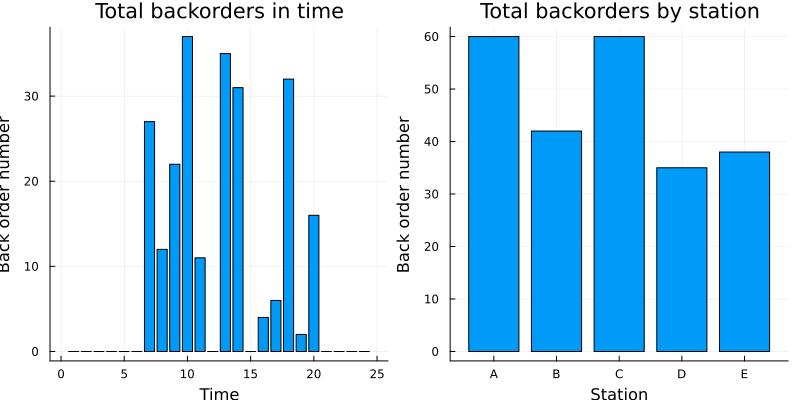

In [13]:
using Plots
sums = sum.(eachrow(bo_df))
sums2 = sum.(eachcol(bo_df))
time = collect(range(1, stop=24))
station =['A','B','C','D','E']
p1 = Plots.bar(time,sums,legend=false,   xguide = "Time",
    yguide = "Back order number",title = "Total backorders in time", size = (800,400))
p2 = Plots.bar(station,sums2,legend=false,   xguide = "Station",
    yguide = "Back order number",title = "Total backorders by station",size = (800,400))
Plots.plot(p1,p2,layout = (1,2))


*Figure 3. Backorders in time and station scale*

In case 3, we rent some vehicles from the third-party supplier to maximum the service rate. From our model, the company is recommended to rent 6 vehicles at station A and 3 vihicles at station C, and the backorder number would significanltly decrease in the senario (Figure 4). 

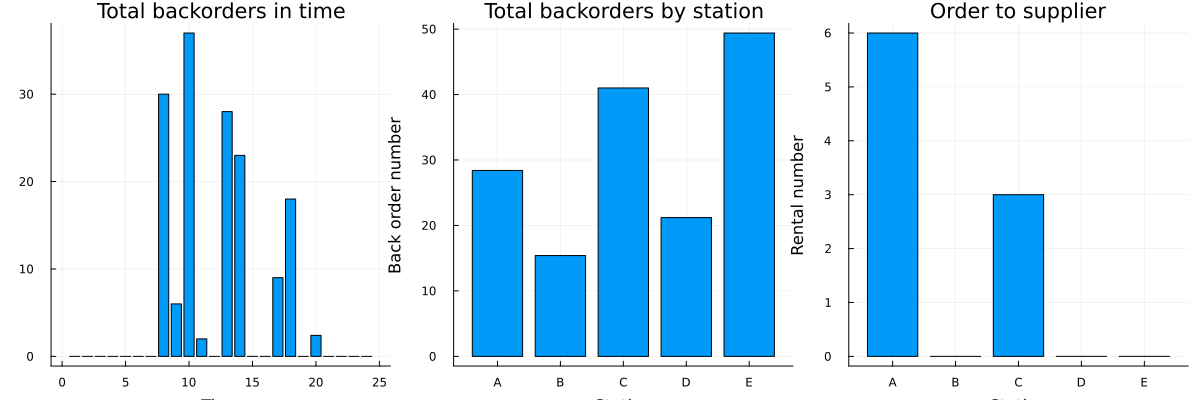

In [14]:
sums = sum.(eachrow(bo_df3))
sums2 = sum.(eachcol(bo_df3))
time = collect(range(1, stop=24))
station =['A','B','C','D','E']
p1 = Plots.bar(time,sums,legend=false,   xguide = "Time",
    yguide = "Back order number",title = "Total backorders in time", size = (1200,400))
p2 = Plots.bar(station,sums2,legend=false,   xguide = "Station",
    yguide = "Back order number",title = "Total backorders by station",size = (1200,400))
p3 = Plots.bar(station,sp,legend=false,   xguide = "Station",
    yguide = "Rental number",title = "Order to supplier",size = (1200,400))
Plots.plot(p1,p2,p3,layout = (1,3))

![jupyter](./proposal_graph.png)
*Figure 4. Backorders while renting more vehicles*

#### Trade-off between profits and service rate

As we discussed previously, there is a trade-off between profits and service rate. In case 2, the trade-off can be determined by the number of vehicles we relocate. When we relocate more vehicles, the relocation fee reduces more profit,but will increases service rate. However, the trade-off will be ignored when penalty cost is taken into consideration. This is becasue the penalty cost from losing customer is always the most, so our target in the senario would always be maximizing service rate  no matter how much weight (tradeoff parameter) we set in the objective function (figure 5).

\begin{alignat}{2}
    \max_{}~~  |J_{profits} |\ +\ \lambda |J_{service\ rate} | \\
\end{alignat}

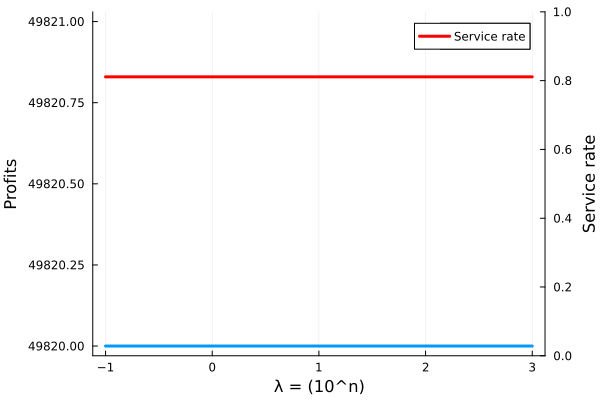

In [15]:
x1 = [-1,0,1,2,3]
y1 = result_J12

# Create some data for the second curve
x2 = x1
y2 = result_J22

# Create a plot with a secondary y-axis
Plots.plot(x1, y1, label="Curve 1",xguide = "λ = (10^n)",yguide = "Profits", linewidth = 3)
plot!(Plots.twinx(), x2, y2, label="Service rate",yguide = "Service rate",ylim = (0,1), linecolor=:red,linewidth = 3)

# Add legends for both curves
plot!(legend=:topright)

#plot!(xguide = "Station",yguide = "Rental number")

*Figure 5. Profits and service rate vs. trade-off parameter in case 2*

In case 3, the rental cost from the third-party supplier is introduced, which can compensate the effect of penalty cost. In this case, when we rent more vehicles from the supplier, the total profits would drop since the rental cost is higher than the penalty cost. At the same time, the service rate would increase since there are more vehicles available in our system (Table 4). In the following figure (Figure 6), two curves show the trade-off between the profits and service rate. By using the previous $\lambda$ value, we can get 50k in profits and 0.8 service rate. If we want to gain more customer satisfaction and service rate, trade-off parameter can be set to larger scale. For example, when the $\lambda$ changes to $10^3$, we can get 100% service rate, with 23k profits as compensation.

| $\lambda$ | A   | B  | C  | D  |  E | Service rate| 
| --------- |:---:| --:| --:| --:| --:| -----------:|
| 0.1       | 0   | 0  | 2  | 0  | 0  |  0.82       |
|   1       | 0   | 0  | 2  | 0  | 0  |  0.82       |
| 10        | 6   | 0  | 3  | 0  | 0  |  0.86       |
| 100       | 8   | 2  | 16 | 0  | 9  |  0.95       |
| 1000      | 17  | 2  | 24 | 0  | 21 |  1.0        |

*Table 4. Service rate with different trade-off parameter values*


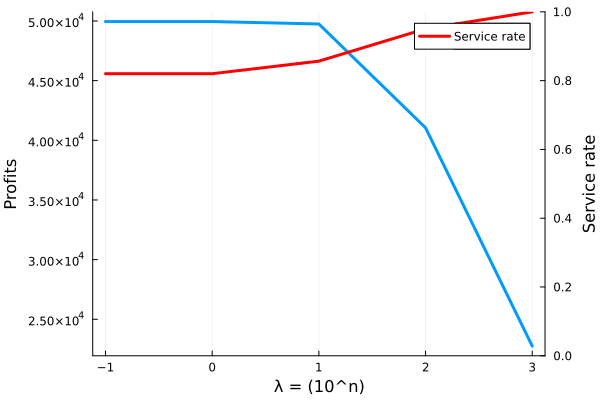

In [21]:
x1 = [-1,0,1,2,3]
y1 = result_J1

# Create some data for the second curve
x2 = x1
y2 = result_J2

# Create a plot with a secondary y-axis
Plots.plot(x1, y1, label="profit",xguide = "λ = (10^n)",yguide = "Profits", linewidth = 3)
plot!(Plots.twinx(), x2, y2, label="Service rate",yguide = "Service rate",ylim = (0,1), linecolor=:red,linewidth = 3)

# Add legends for both curves
plot!(legend=:topright)

#plot!(xguide = "Station",yguide = "Rental number")

*Figure 6. Profits and service rate vs. trade-off parameter in case 3*

#### Acceptable price

In the previous section, we made an assumption that the daily rental cost from supplier is 1000. In reality, we can find the acceptable price by given service rate. The relationship between the acceptable price and service rate can be interpreted in the following figure (Figure 7). For example, when we want to reach around 0.9 in service rate, we need to rent 20 vehicles. If we are renting 20 vehicles, the acceptable rental price from supplier would be around 840 such that we can maintain the same profits as we made in case two. Obviously, the higher service rate we want to get, the lower offer we can give to the supplier. In reality, the price from the supplier is not negotiable, so the company can use this analysis to find the decision. On the other hand, we always want to sacrifice some profits to gain more service rate. 

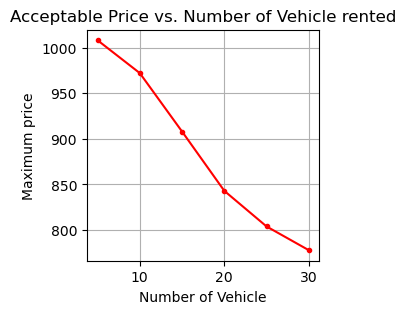

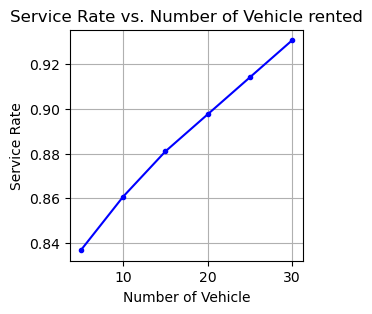

In [28]:
x= [5, 10, 15, 20, 25, 30];
figure(figsize = (3,3))
PyPlot.plot(x,result_Mc,"r.-", markersize=6)
xlabel("Number of Vehicle")
ylabel("Maximum price")
#legend(loc = "upper left")
PyPlot.grid()
title("Acceptable Price vs. Number of Vehicle rented");

figure(figsize = (3,3))
PyPlot.plot(x,result_rt,"b.-", markersize=6)
xlabel("Number of Vehicle")
ylabel("Service Rate")
#legend(loc = "upper left")
PyPlot.grid()
title("Service Rate vs. Number of Vehicle rented");

*Figure 7. Acceptable price vs. rental number and service rate*

# 5. Conclusion

<b/>Conclusion

Based on the analysis all above, we conclude that relocation is a viable way to improve the business result of Zipcar. However, backorders still exist even after relocating, indicating that Zipcar needs to add more cars into the operation. On the other hand, outsourcing has proved that the service rate will be increased indeed, but the profit will be reduced as the trade-off. Therefore, we have two recommendations for Zipcar： Investing more vehicles and negotiating with third-party companies for lower cost.

Our first suggestion is that Zipcar consider adding more cars into the operation for the five locations. As we can see from the figure 3 that all five locations have backorders in case 1 and case 2. Plus, It is reflected from table 3 that the vehicles available for relocating are very little, which means the total number of cars  in the system need to be increased to meet the demand. However, the challenge in this scenario is that Zipcar will need to have a reliable demand forecasting system. An accurate forecasting data will help Zipcar to add the optimal amount of vehicles that will maximize service rate while avoiding inventory overstock. Besides, the timeline of the data we analyzed is only one day. So Zipcar also needs to consider the demand fluctuation from seasonality before making the decision.

The second suggestion we have is negotiating the outsource cost with third party companies. As we can see from the figure 4 that the strategy of outsourcing can remarkably reduce the amount of backorders. The advantage of outsourcing over the first recommendation is that it provides Zipcar with flexibility. Zipcar can easily adjust the number of vehicles in their operation as the demand changes, and do not need to consider the overstock issue during slack season. However, we have the assumption that the cost of outsourcing is higher than the profit, so there is a trade-off for Zipcar to make between service rate and revenue. Therefore, Zipcar may consider negotiating the outsource cost with the third party in order to achieve a  long-term strategic partnership that mutually benefits both parties. Under the partnership, Zipcar will be able to improve the operation without sacrificing revenue, while the third party will receive more orders and business possibilities.

The result from our model has proved the feasibility of the methods, and we believe the report will benefit the business performance of Zipcar, especially if our recommendations can be implemented.


# 6. Reference

Jiaxin, Tian. (2022). *Vehicle Sharing Inventory Management* [Unpublished manuscript]. University of Wisconsin Madison


<style>
.input_prompt, .output_prompt {
    display: none;
}
</style>

<style>
.input_prompt, .output_prompt {
    display: none;
}
</style>

<style>
.input_prompt, .output_prompt {
    display: none; 
} 
</style>